###Pre-processing

Import Libraries

In [ ]:
import re
import numpy as np
import pandas as pd

Dataset

In [ ]:
read_file = pd.read_excel('reviewShopee.xlsx')
read_file.to_csv ("playstorescrapping.csv", index = None)

In [ ]:
dataScraping = pd.read_csv('playstorescrapping.csv', sep=',')
dataScraping

,content,sentimen,aspek
0,"Mempermudah segalana nya, cukup dari rumah saj...",positif,Efficiency
1,Membantu belanja.....apalagi bt emakÂ² dua bun...,positif,Efficiency
2,"Aplikasinya sering gelag , klo buka fiture bel...",negatif,Efficiency
3,"Aplikasi ini cocok ny bukan buat belanja lgi, ...",negatif,Efficiency
4,Lebih baik dihilangkan saja fitur live/reels/v...,negatif,Efficiency
...,...,...,...
1395,Tingkat respons dari penjual di aplikasi sanga...,positif,Responsiveness
1396,Saya pernah mengirimkan pertanyaan melalui ema...,positif,Responsiveness
1397,Cs nya sigap menyelesaikan masalah yang saya h...,positif,Responsiveness
1398,Sigap menjawab semua pertanyaan yang saya kelu...,positif,Responsiveness


In [ ]:
from sklearn.utils import shuffle
dataScraping = shuffle(dataScraping)

In [ ]:
dataScraping

In [ ]:
dataScraping.to_csv ("scrapping.csv", index = None)

In [ ]:
dataScraping = pd.read_csv('scrapping.csv', sep=',')
dataScraping

,content,sentimen,aspek
0,"Mohon maaf, mangapa Shopee Lebih susah untuk d...",negatif,Efficiency
1,Skarang bnyak akun toko penipuh!!!!,negatif,Privacy
2,Sangat puas.. barang yg datang sesuai dan pela...,positif,Fulfillment
3,"Sangat membantu dan mepermudah dalam belanja, ...",positif,Efficiency
4,"Fitur pencariannya ngga akurat, makin banyak b...",negatif,System Availability
...,...,...,...
1395,Cs nya melayani merespons dengan baik,positif,Responsiveness
1396,"Aplikasi shoppe parah, saya membeli barang tet...",negatif,Responsiveness
1397,"Masukkan buat shopee,ketika customer meminta u...",negatif,Compensation
1398,Mohon di perbaiki di update terbarunya ngga bi...,negatif,System Availability


In [ ]:
sentimen = dataScraping.loc[:,['sentimen']]
aspek = dataScraping.loc[:,['aspek']]

In [ ]:
sentimen

,sentimen
0,negatif
1,negatif
2,positif
3,positif
4,negatif
...,...
1395,positif
1396,negatif
1397,negatif
1398,negatif


In [ ]:
aspek

,aspek
0,Efficiency
1,Privacy
2,Fulfillment
3,Efficiency
4,System Availability
...,...
1395,Responsiveness
1396,Responsiveness
1397,Compensation
1398,System Availability


In [ ]:
sentimen.to_csv("sentimen.csv", index = None, header=True)
aspek.to_csv("aspek.csv", index = None, header=True)

In [ ]:
dataScraping['sentimen'].value_counts()

negatif    702
positif    698
Name: sentimen, dtype: int64

In [ ]:
dataScraping['aspek'].value_counts()

Efficiency             217
Fulfillment            214
Compensation           197
Responsiveness         196
System Availability    194
Privacy                192
Contact                190
Name: aspek, dtype: int64

In [ ]:
ulasan = dataScraping.loc[:,['content']]
ulasan

,content
0,"Mohon maaf, mangapa Shopee Lebih susah untuk d..."
1,Skarang bnyak akun toko penipuh!!!!
2,Sangat puas.. barang yg datang sesuai dan pela...
3,"Sangat membantu dan mepermudah dalam belanja, ..."
4,"Fitur pencariannya ngga akurat, makin banyak b..."
...,...
1395,Cs nya melayani merespons dengan baik
1396,"Aplikasi shoppe parah, saya membeli barang tet..."
1397,"Masukkan buat shopee,ketika customer meminta u..."
1398,Mohon di perbaiki di update terbarunya ngga bi...


In [ ]:
ulasan.to_csv("ulasan.csv", index = None, header=True)

In [ ]:
datascrap = pd.read_csv('ulasan.csv')
datascrap

,content
0,"Mohon maaf, mangapa Shopee Lebih susah untuk d..."
1,Skarang bnyak akun toko penipuh!!!!
2,Sangat puas.. barang yg datang sesuai dan pela...
3,"Sangat membantu dan mepermudah dalam belanja, ..."
4,"Fitur pencariannya ngga akurat, makin banyak b..."
...,...
1395,Cs nya melayani merespons dengan baik
1396,"Aplikasi shoppe parah, saya membeli barang tet..."
1397,"Masukkan buat shopee,ketika customer meminta u..."
1398,Mohon di perbaiki di update terbarunya ngga bi...


1. Casefolding

In [ ]:
def casefolding(content):
  content = content.casefold()
  return content

In [ ]:
datascrap['casefolding_cleaning'] = datascrap['content'].apply(casefolding)
datascrap

,content,casefolding_cleaning
0,"Mohon maaf, mangapa Shopee Lebih susah untuk d...","mohon maaf, mangapa shopee lebih susah untuk d..."
1,Skarang bnyak akun toko penipuh!!!!,skarang bnyak akun toko penipuh!!!!
2,Sangat puas.. barang yg datang sesuai dan pela...,sangat puas.. barang yg datang sesuai dan pela...
3,"Sangat membantu dan mepermudah dalam belanja, ...","sangat membantu dan mepermudah dalam belanja, ..."
4,"Fitur pencariannya ngga akurat, makin banyak b...","fitur pencariannya ngga akurat, makin banyak b..."
...,...,...
1395,Cs nya melayani merespons dengan baik,cs nya melayani merespons dengan baik
1396,"Aplikasi shoppe parah, saya membeli barang tet...","aplikasi shoppe parah, saya membeli barang tet..."
1397,"Masukkan buat shopee,ketika customer meminta u...","masukkan buat shopee,ketika customer meminta u..."
1398,Mohon di perbaiki di update terbarunya ngga bi...,mohon di perbaiki di update terbarunya ngga bi...


2. Remove Punctuation

In [ ]:
#Remove Puncutuation dan karakter yg tdk dibutuhkan
clean_spcl = re.compile('[/(){}\[\]\|@,;]')
clean_symbol = re.compile('[^0-9a-zA-Z]')
def clean_punct(content):
  content = clean_spcl.sub(' ', content)
  content = clean_symbol.sub(' ', content)
  content = re.sub('((www\.[^\s]+) | (https?://[^\s]+))', ' ', content) #remove url
  content = re.sub('@[^\s]+', ' ', content) #remove username
  content = re.sub(':v', ' ', content) #menghilangkan :v
  content = re.sub(';v', ' ', content) #menghilangkan ;v
  content = re.sub('s/d', ' sampai dengan', content) #mengganti dgn sampai dengan
  return content

In [ ]:
datascrap['clean_punct'] = datascrap['casefolding_cleaning'].apply(clean_punct)
datascrap

,content,casefolding_cleaning,clean_punct
0,"Mohon maaf, mangapa Shopee Lebih susah untuk d...","mohon maaf, mangapa shopee lebih susah untuk d...",mohon maaf mangapa shopee lebih susah untuk d...
1,Skarang bnyak akun toko penipuh!!!!,skarang bnyak akun toko penipuh!!!!,skarang bnyak akun toko penipuh
2,Sangat puas.. barang yg datang sesuai dan pela...,sangat puas.. barang yg datang sesuai dan pela...,sangat puas barang yg datang sesuai dan pela...
3,"Sangat membantu dan mepermudah dalam belanja, ...","sangat membantu dan mepermudah dalam belanja, ...",sangat membantu dan mepermudah dalam belanja ...
4,"Fitur pencariannya ngga akurat, makin banyak b...","fitur pencariannya ngga akurat, makin banyak b...",fitur pencariannya ngga akurat makin banyak b...
...,...,...,...
1395,Cs nya melayani merespons dengan baik,cs nya melayani merespons dengan baik,cs nya melayani merespons dengan baik
1396,"Aplikasi shoppe parah, saya membeli barang tet...","aplikasi shoppe parah, saya membeli barang tet...",aplikasi shoppe parah saya membeli barang tet...
1397,"Masukkan buat shopee,ketika customer meminta u...","masukkan buat shopee,ketika customer meminta u...",masukkan buat shopee ketika customer meminta u...
1398,Mohon di perbaiki di update terbarunya ngga bi...,mohon di perbaiki di update terbarunya ngga bi...,mohon di perbaiki di update terbarunya ngga bi...


3. Remove Repetition of Any Character

In [ ]:
def replaceThreeOrMore(content):
  pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
  return pattern.sub(r"\1\1", content)

In [ ]:
datascrap['replaceThreeOrMore'] = datascrap['clean_punct'].apply(replaceThreeOrMore)
datascrap

,content,casefolding_cleaning,clean_punct,replaceThreeOrMore
0,"Mohon maaf, mangapa Shopee Lebih susah untuk d...","mohon maaf, mangapa shopee lebih susah untuk d...",mohon maaf mangapa shopee lebih susah untuk d...,mohon maaf mangapa shopee lebih susah untuk d...
1,Skarang bnyak akun toko penipuh!!!!,skarang bnyak akun toko penipuh!!!!,skarang bnyak akun toko penipuh,skarang bnyak akun toko penipuh
2,Sangat puas.. barang yg datang sesuai dan pela...,sangat puas.. barang yg datang sesuai dan pela...,sangat puas barang yg datang sesuai dan pela...,sangat puas barang yg datang sesuai dan pelay...
3,"Sangat membantu dan mepermudah dalam belanja, ...","sangat membantu dan mepermudah dalam belanja, ...",sangat membantu dan mepermudah dalam belanja ...,sangat membantu dan mepermudah dalam belanja ...
4,"Fitur pencariannya ngga akurat, makin banyak b...","fitur pencariannya ngga akurat, makin banyak b...",fitur pencariannya ngga akurat makin banyak b...,fitur pencariannya ngga akurat makin banyak b...
...,...,...,...,...
1395,Cs nya melayani merespons dengan baik,cs nya melayani merespons dengan baik,cs nya melayani merespons dengan baik,cs nya melayani merespons dengan baik
1396,"Aplikasi shoppe parah, saya membeli barang tet...","aplikasi shoppe parah, saya membeli barang tet...",aplikasi shoppe parah saya membeli barang tet...,aplikasi shoppe parah saya membeli barang tet...
1397,"Masukkan buat shopee,ketika customer meminta u...","masukkan buat shopee,ketika customer meminta u...",masukkan buat shopee ketika customer meminta u...,masukkan buat shopee ketika customer meminta u...
1398,Mohon di perbaiki di update terbarunya ngga bi...,mohon di perbaiki di update terbarunya ngga bi...,mohon di perbaiki di update terbarunya ngga bi...,mohon di perbaiki di update terbarunya ngga bi...


4. Normalize kata Alay

In [ ]:
#Kamus alay
alay_dict = pd.read_csv('new_kamusalay1.csv', names = ['original', 'replacement'], encoding='latin-1')
alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))

#Mengganti kata-kata yang dianggap alay
def normalize_alay(text):
  return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])

In [ ]:
datascrap['normalize_alay'] = datascrap['replaceThreeOrMore'].apply(normalize_alay)
datascrap

,content,casefolding_cleaning,clean_punct,replaceThreeOrMore,normalize_alay
0,"Mohon maaf, mangapa Shopee Lebih susah untuk d...","mohon maaf, mangapa shopee lebih susah untuk d...",mohon maaf mangapa shopee lebih susah untuk d...,mohon maaf mangapa shopee lebih susah untuk d...,mohon maaf mangapa shopee lebih susah untuk d...
1,Skarang bnyak akun toko penipuh!!!!,skarang bnyak akun toko penipuh!!!!,skarang bnyak akun toko penipuh,skarang bnyak akun toko penipuh,sekarang banyak akun toko penipu
2,Sangat puas.. barang yg datang sesuai dan pela...,sangat puas.. barang yg datang sesuai dan pela...,sangat puas barang yg datang sesuai dan pela...,sangat puas barang yg datang sesuai dan pelay...,sangat puas barang yang datang sesuai dan pel...
3,"Sangat membantu dan mepermudah dalam belanja, ...","sangat membantu dan mepermudah dalam belanja, ...",sangat membantu dan mepermudah dalam belanja ...,sangat membantu dan mepermudah dalam belanja ...,sangat membantu dan mepermudah dalam belanja ...
4,"Fitur pencariannya ngga akurat, makin banyak b...","fitur pencariannya ngga akurat, makin banyak b...",fitur pencariannya ngga akurat makin banyak b...,fitur pencariannya ngga akurat makin banyak b...,fitur pencariannya tidak akurat makin banyak ...
...,...,...,...,...,...
1395,Cs nya melayani merespons dengan baik,cs nya melayani merespons dengan baik,cs nya melayani merespons dengan baik,cs nya melayani merespons dengan baik,customer service nya melayani merespons dengan...
1396,"Aplikasi shoppe parah, saya membeli barang tet...","aplikasi shoppe parah, saya membeli barang tet...",aplikasi shoppe parah saya membeli barang tet...,aplikasi shoppe parah saya membeli barang tet...,aplikasi shopee parah saya membeli barang tet...
1397,"Masukkan buat shopee,ketika customer meminta u...","masukkan buat shopee,ketika customer meminta u...",masukkan buat shopee ketika customer meminta u...,masukkan buat shopee ketika customer meminta u...,masukan buat shopee ketika customer meminta un...
1398,Mohon di perbaiki di update terbarunya ngga bi...,mohon di perbaiki di update terbarunya ngga bi...,mohon di perbaiki di update terbarunya ngga bi...,mohon di perbaiki di update terbarunya ngga bi...,mohon di perbaiki di update terbarunya tidak b...


5. Remove Whitespace and Number

In [ ]:
def removeangkachar(content):
    content = re.sub('\d+', '', content) #Remove angka
    return content.strip(" ")

In [ ]:
#Menghapus Double atau Lebih Whitespace
def normalize_whitespace(content):
    content = str(content)
    content = re.sub(r"//t",r"\t", content)
    content = re.sub(r"( )\1+",r"\1", content)
    content = re.sub(r"(\n)\1+",r"\1", content)
    content = re.sub(r"(\r)\1+",r"\1", content)
    content = re.sub(r"(\t)\1+",r"\1", content)
    return content.strip(" ")

In [ ]:
datascrap['removeangkachar'] = datascrap['normalize_alay'].apply(removeangkachar)
datascrap['normalize_whitespace'] = datascrap['removeangkachar'].apply(normalize_whitespace)

In [ ]:
datascrap

,content,casefolding_cleaning,clean_punct,replaceThreeOrMore,normalize_alay,removeangkachar,normalize_whitespace
0,"Mohon maaf, mangapa Shopee Lebih susah untuk d...","mohon maaf, mangapa shopee lebih susah untuk d...",mohon maaf mangapa shopee lebih susah untuk d...,mohon maaf mangapa shopee lebih susah untuk d...,mohon maaf mangapa shopee lebih susah untuk d...,mohon maaf mangapa shopee lebih susah untuk d...,mohon maaf mangapa shopee lebih susah untuk di...
1,Skarang bnyak akun toko penipuh!!!!,skarang bnyak akun toko penipuh!!!!,skarang bnyak akun toko penipuh,skarang bnyak akun toko penipuh,sekarang banyak akun toko penipu,sekarang banyak akun toko penipu,sekarang banyak akun toko penipu
2,Sangat puas.. barang yg datang sesuai dan pela...,sangat puas.. barang yg datang sesuai dan pela...,sangat puas barang yg datang sesuai dan pela...,sangat puas barang yg datang sesuai dan pelay...,sangat puas barang yang datang sesuai dan pel...,sangat puas barang yang datang sesuai dan pel...,sangat puas barang yang datang sesuai dan pela...
3,"Sangat membantu dan mepermudah dalam belanja, ...","sangat membantu dan mepermudah dalam belanja, ...",sangat membantu dan mepermudah dalam belanja ...,sangat membantu dan mepermudah dalam belanja ...,sangat membantu dan mepermudah dalam belanja ...,sangat membantu dan mepermudah dalam belanja ...,sangat membantu dan mepermudah dalam belanja d...
4,"Fitur pencariannya ngga akurat, makin banyak b...","fitur pencariannya ngga akurat, makin banyak b...",fitur pencariannya ngga akurat makin banyak b...,fitur pencariannya ngga akurat makin banyak b...,fitur pencariannya tidak akurat makin banyak ...,fitur pencariannya tidak akurat makin banyak ...,fitur pencariannya tidak akurat makin banyak b...
...,...,...,...,...,...,...,...
1395,Cs nya melayani merespons dengan baik,cs nya melayani merespons dengan baik,cs nya melayani merespons dengan baik,cs nya melayani merespons dengan baik,customer service nya melayani merespons dengan...,customer service nya melayani merespons dengan...,customer service nya melayani merespons dengan...
1396,"Aplikasi shoppe parah, saya membeli barang tet...","aplikasi shoppe parah, saya membeli barang tet...",aplikasi shoppe parah saya membeli barang tet...,aplikasi shoppe parah saya membeli barang tet...,aplikasi shopee parah saya membeli barang tet...,aplikasi shopee parah saya membeli barang tet...,aplikasi shopee parah saya membeli barang teta...
1397,"Masukkan buat shopee,ketika customer meminta u...","masukkan buat shopee,ketika customer meminta u...",masukkan buat shopee ketika customer meminta u...,masukkan buat shopee ketika customer meminta u...,masukan buat shopee ketika customer meminta un...,masukan buat shopee ketika customer meminta un...,masukan buat shopee ketika customer meminta un...
1398,Mohon di perbaiki di update terbarunya ngga bi...,mohon di perbaiki di update terbarunya ngga bi...,mohon di perbaiki di update terbarunya ngga bi...,mohon di perbaiki di update terbarunya ngga bi...,mohon di perbaiki di update terbarunya tidak b...,mohon di perbaiki di update terbarunya tidak b...,mohon di perbaiki di update terbarunya tidak b...


6. Tokenizing

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
datascrap['tokenizing'] = datascrap.apply(lambda row: nltk.tokenize.word_tokenize(row['normalize_whitespace']),axis=1)
datascrap

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,content,casefolding_cleaning,clean_punct,replaceThreeOrMore,normalize_alay,removeangkachar,normalize_whitespace,tokenizing
0,"Mohon maaf, mangapa Shopee Lebih susah untuk d...","mohon maaf, mangapa shopee lebih susah untuk d...",mohon maaf mangapa shopee lebih susah untuk d...,mohon maaf mangapa shopee lebih susah untuk d...,mohon maaf mangapa shopee lebih susah untuk d...,mohon maaf mangapa shopee lebih susah untuk d...,mohon maaf mangapa shopee lebih susah untuk di...,"[mohon, maaf, mangapa, shopee, lebih, susah, u..."
1,Skarang bnyak akun toko penipuh!!!!,skarang bnyak akun toko penipuh!!!!,skarang bnyak akun toko penipuh,skarang bnyak akun toko penipuh,sekarang banyak akun toko penipu,sekarang banyak akun toko penipu,sekarang banyak akun toko penipu,"[sekarang, banyak, akun, toko, penipu]"
2,Sangat puas.. barang yg datang sesuai dan pela...,sangat puas.. barang yg datang sesuai dan pela...,sangat puas barang yg datang sesuai dan pela...,sangat puas barang yg datang sesuai dan pelay...,sangat puas barang yang datang sesuai dan pel...,sangat puas barang yang datang sesuai dan pel...,sangat puas barang yang datang sesuai dan pela...,"[sangat, puas, barang, yang, datang, sesuai, d..."
3,"Sangat membantu dan mepermudah dalam belanja, ...","sangat membantu dan mepermudah dalam belanja, ...",sangat membantu dan mepermudah dalam belanja ...,sangat membantu dan mepermudah dalam belanja ...,sangat membantu dan mepermudah dalam belanja ...,sangat membantu dan mepermudah dalam belanja ...,sangat membantu dan mepermudah dalam belanja d...,"[sangat, membantu, dan, mepermudah, dalam, bel..."
4,"Fitur pencariannya ngga akurat, makin banyak b...","fitur pencariannya ngga akurat, makin banyak b...",fitur pencariannya ngga akurat makin banyak b...,fitur pencariannya ngga akurat makin banyak b...,fitur pencariannya tidak akurat makin banyak ...,fitur pencariannya tidak akurat makin banyak ...,fitur pencariannya tidak akurat makin banyak b...,"[fitur, pencariannya, tidak, akurat, makin, ba..."
...,...,...,...,...,...,...,...,...
1395,Cs nya melayani merespons dengan baik,cs nya melayani merespons dengan baik,cs nya melayani merespons dengan baik,cs nya melayani merespons dengan baik,customer service nya melayani merespons dengan...,customer service nya melayani merespons dengan...,customer service nya melayani merespons dengan...,"[customer, service, nya, melayani, merespons, ..."
1396,"Aplikasi shoppe parah, saya membeli barang tet...","aplikasi shoppe parah, saya membeli barang tet...",aplikasi shoppe parah saya membeli barang tet...,aplikasi shoppe parah saya membeli barang tet...,aplikasi shopee parah saya membeli barang tet...,aplikasi shopee parah saya membeli barang tet...,aplikasi shopee parah saya membeli barang teta...,"[aplikasi, shopee, parah, saya, membeli, baran..."
1397,"Masukkan buat shopee,ketika customer meminta u...","masukkan buat shopee,ketika customer meminta u...",masukkan buat shopee ketika customer meminta u...,masukkan buat shopee ketika customer meminta u...,masukan buat shopee ketika customer meminta un...,masukan buat shopee ketika customer meminta un...,masukan buat shopee ketika customer meminta un...,"[masukan, buat, shopee, ketika, customer, memi..."
1398,Mohon di perbaiki di update terbarunya ngga bi...,mohon di perbaiki di update terbarunya ngga bi...,mohon di perbaiki di update terbarunya ngga bi...,mohon di perbaiki di update terbarunya ngga bi...,mohon di perbaiki di update terbarunya tidak b...,mohon di perbaiki di update terbarunya tidak b...,mohon di perbaiki di update terbarunya tidak b...,"[mohon, di, perbaiki, di, update, terbarunya, ..."


7. Stopword Removal

In [ ]:
!pip install sastrawi

In [ ]:
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
exclude_stopword = ['tidak', 'belum', 'selain', 'tidak bisa', 'bisa', 'belum bisa', 'ada']
remove_words = ([word for word in stopwords if word not in exclude_stopword])
final_stop_words = ArrayDictionary(remove_words)
def remove_stopwords(content):
  factory = StopWordRemover(final_stop_words)
  content = [factory.remove(x) for x in content]
  return content

In [ ]:
remove_words

['yang',
 'untuk',
 'pada',
 'ke',
 'para',
 'namun',
 'menurut',
 'antara',
 'dia',
 'dua',
 'ia',
 'seperti',
 'jika',
 'jika',
 'sehingga',
 'kembali',
 'dan',
 'ini',
 'karena',
 'kepada',
 'oleh',
 'saat',
 'harus',
 'sementara',
 'setelah',
 'kami',
 'sekitar',
 'bagi',
 'serta',
 'di',
 'dari',
 'telah',
 'sebagai',
 'masih',
 'hal',
 'ketika',
 'adalah',
 'itu',
 'dalam',
 'bahwa',
 'atau',
 'hanya',
 'kita',
 'dengan',
 'akan',
 'juga',
 'mereka',
 'sudah',
 'saya',
 'terhadap',
 'secara',
 'agar',
 'lain',
 'anda',
 'begitu',
 'mengapa',
 'kenapa',
 'yaitu',
 'yakni',
 'daripada',
 'itulah',
 'lagi',
 'maka',
 'tentang',
 'demi',
 'dimana',
 'kemana',
 'pula',
 'sambil',
 'sebelum',
 'sesudah',
 'supaya',
 'guna',
 'kah',
 'pun',
 'sampai',
 'sedangkan',
 'selagi',
 'sementara',
 'tetapi',
 'apakah',
 'kecuali',
 'sebab',
 'seolah',
 'seraya',
 'seterusnya',
 'tanpa',
 'agak',
 'boleh',
 'dapat',
 'dsb',
 'dst',
 'dll',
 'dahulu',
 'dulunya',
 'anu',
 'demikian',
 'tapi',
 'i

In [ ]:
datascrap['remove_stopwords'] = datascrap['tokenizing'].apply(lambda x: remove_stopwords(x))
datascrap

,content,casefolding_cleaning,clean_punct,replaceThreeOrMore,normalize_alay,removeangkachar,normalize_whitespace,tokenizing,remove_stopwords
0,"Mohon maaf, mangapa Shopee Lebih susah untuk d...","mohon maaf, mangapa shopee lebih susah untuk d...",mohon maaf mangapa shopee lebih susah untuk d...,mohon maaf mangapa shopee lebih susah untuk d...,mohon maaf mangapa shopee lebih susah untuk d...,mohon maaf mangapa shopee lebih susah untuk d...,mohon maaf mangapa shopee lebih susah untuk di...,"[mohon, maaf, mangapa, shopee, lebih, susah, u...","[mohon, maaf, mangapa, shopee, lebih, susah, ,..."
1,Skarang bnyak akun toko penipuh!!!!,skarang bnyak akun toko penipuh!!!!,skarang bnyak akun toko penipuh,skarang bnyak akun toko penipuh,sekarang banyak akun toko penipu,sekarang banyak akun toko penipu,sekarang banyak akun toko penipu,"[sekarang, banyak, akun, toko, penipu]","[sekarang, banyak, akun, toko, penipu]"
2,Sangat puas.. barang yg datang sesuai dan pela...,sangat puas.. barang yg datang sesuai dan pela...,sangat puas barang yg datang sesuai dan pela...,sangat puas barang yg datang sesuai dan pelay...,sangat puas barang yang datang sesuai dan pel...,sangat puas barang yang datang sesuai dan pel...,sangat puas barang yang datang sesuai dan pela...,"[sangat, puas, barang, yang, datang, sesuai, d...","[sangat, puas, barang, , datang, sesuai, , pel..."
3,"Sangat membantu dan mepermudah dalam belanja, ...","sangat membantu dan mepermudah dalam belanja, ...",sangat membantu dan mepermudah dalam belanja ...,sangat membantu dan mepermudah dalam belanja ...,sangat membantu dan mepermudah dalam belanja ...,sangat membantu dan mepermudah dalam belanja ...,sangat membantu dan mepermudah dalam belanja d...,"[sangat, membantu, dan, mepermudah, dalam, bel...","[sangat, membantu, , mepermudah, , belanja, , ..."
4,"Fitur pencariannya ngga akurat, makin banyak b...","fitur pencariannya ngga akurat, makin banyak b...",fitur pencariannya ngga akurat makin banyak b...,fitur pencariannya ngga akurat makin banyak b...,fitur pencariannya tidak akurat makin banyak ...,fitur pencariannya tidak akurat makin banyak ...,fitur pencariannya tidak akurat makin banyak b...,"[fitur, pencariannya, tidak, akurat, makin, ba...","[fitur, pencariannya, tidak, akurat, makin, ba..."
...,...,...,...,...,...,...,...,...,...
1395,Cs nya melayani merespons dengan baik,cs nya melayani merespons dengan baik,cs nya melayani merespons dengan baik,cs nya melayani merespons dengan baik,customer service nya melayani merespons dengan...,customer service nya melayani merespons dengan...,customer service nya melayani merespons dengan...,"[customer, service, nya, melayani, merespons, ...","[customer, service, nya, melayani, merespons, ..."
1396,"Aplikasi shoppe parah, saya membeli barang tet...","aplikasi shoppe parah, saya membeli barang tet...",aplikasi shoppe parah saya membeli barang tet...,aplikasi shoppe parah saya membeli barang tet...,aplikasi shopee parah saya membeli barang tet...,aplikasi shopee parah saya membeli barang tet...,aplikasi shopee parah saya membeli barang teta...,"[aplikasi, shopee, parah, saya, membeli, baran...","[aplikasi, shopee, parah, , membeli, barang, ,..."
1397,"Masukkan buat shopee,ketika customer meminta u...","masukkan buat shopee,ketika customer meminta u...",masukkan buat shopee ketika customer meminta u...,masukkan buat shopee ketika customer meminta u...,masukan buat shopee ketika customer meminta un...,masukan buat shopee ketika customer meminta un...,masukan buat shopee ketika customer meminta un...,"[masukan, buat, shopee, ketika, customer, memi...","[masukan, buat, shopee, , customer, meminta, ,..."
1398,Mohon di perbaiki di update terbarunya ngga bi...,mohon di perbaiki di update terbarunya ngga bi...,mohon di perbaiki di update terbarunya ngga bi...,mohon di perbaiki di update terbarunya ngga bi...,mohon di perbaiki di update terbarunya tidak b...,mohon di perbaiki di update terbarunya tidak b...,mohon di perbaiki di update terbarunya tida

8. Lemmatization

In [ ]:
!pip install nlp-id

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.5/320.5 kB 27.8 MB/s eta 0:00:00
  Created wheel for nlp-id: filename=nlp_id-0.1.15.0-py3-none-any.whl size=58153894 sha256=77a32c82cfda5b6440cd6431b534ba2f09d7908f4c8ad35a5c336eb9d6fa9e89
  Stored in directory: /root/.cache/pip/wheels/85/34/2a/deaf7b7896a1eed336b874e1a7732588d40bb7bdc0a824e73e
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=bcffa69c3ad5fc069b8850d623fe851e7f52ee6bfc249e99fb5f139f1411ca7f
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built nlp-id wget
  Attempting uninstall: pytest
    Found existing installation: pytest 7.2.2
    Uninstalling pytest-7.2.2:
      Successfully uninstalled pytest-7.2.2


In [ ]:
from nlp_id.lemmatizer import Lemmatizer
lemmatizer = Lemmatizer()
lemmatizer.lemmatize('Saya sedang mencoba')

'saya sedang coba'

In [ ]:
from datetime import datetime

In [ ]:
start_time = datetime.now()
from nlp_id.lemmatizer import Lemmatizer
def lemma_preproc(content):
  lemmatizer = Lemmatizer()
  content = [lemmatizer.lemmatize(x) for x in content]
  return content

datascrap['lemma_preproc'] = datascrap['remove_stopwords'].apply(lambda x: lemma_preproc(x))
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:18:00.182349


In [ ]:
datascrap

,content,casefolding_cleaning,clean_punct,replaceThreeOrMore,normalize_alay,removeangkachar,normalize_whitespace,tokenizing,remove_stopwords,lemma_preproc
0,"Mohon maaf, mangapa Shopee Lebih susah untuk d...","mohon maaf, mangapa shopee lebih susah untuk d...",mohon maaf mangapa shopee lebih susah untuk d...,mohon maaf mangapa shopee lebih susah untuk d...,mohon maaf mangapa shopee lebih susah untuk d...,mohon maaf mangapa shopee lebih susah untuk d...,mohon maaf mangapa shopee lebih susah untuk di...,"[mohon, maaf, mangapa, shopee, lebih, susah, u...","[mohon, maaf, mangapa, shopee, lebih, susah, ,...","[mohon, maaf, mangapa, shopee, lebih, susah, ,..."
1,Skarang bnyak akun toko penipuh!!!!,skarang bnyak akun toko penipuh!!!!,skarang bnyak akun toko penipuh,skarang bnyak akun toko penipuh,sekarang banyak akun toko penipu,sekarang banyak akun toko penipu,sekarang banyak akun toko penipu,"[sekarang, banyak, akun, toko, penipu]","[sekarang, banyak, akun, toko, penipu]","[sekarang, banyak, akun, toko, tipu]"
2,Sangat puas.. barang yg datang sesuai dan pela...,sangat puas.. barang yg datang sesuai dan pela...,sangat puas barang yg datang sesuai dan pela...,sangat puas barang yg datang sesuai dan pelay...,sangat puas barang yang datang sesuai dan pel...,sangat puas barang yang datang sesuai dan pel...,sangat puas barang yang datang sesuai dan pela...,"[sangat, puas, barang, yang, datang, sesuai, d...","[sangat, puas, barang, , datang, sesuai, , pel...","[sangat, puas, barang, , datang, sesuai, , lay..."
3,"Sangat membantu dan mepermudah dalam belanja, ...","sangat membantu dan mepermudah dalam belanja, ...",sangat membantu dan mepermudah dalam belanja ...,sangat membantu dan mepermudah dalam belanja ...,sangat membantu dan mepermudah dalam belanja ...,sangat membantu dan mepermudah dalam belanja ...,sangat membantu dan mepermudah dalam belanja d...,"[sangat, membantu, dan, mepermudah, dalam, bel...","[sangat, membantu, , mepermudah, , belanja, , ...","[sangat, bantu, , mepermudah, , belanja, , moh..."
4,"Fitur pencariannya ngga akurat, makin banyak b...","fitur pencariannya ngga akurat, makin banyak b...",fitur pencariannya ngga akurat makin banyak b...,fitur pencariannya ngga akurat makin banyak b...,fitur pencariannya tidak akurat makin banyak ...,fitur pencariannya tidak akurat makin banyak ...,fitur pencariannya tidak akurat makin banyak b...,"[fitur, pencariannya, tidak, akurat, makin, ba...","[fitur, pencariannya, tidak, akurat, makin, ba...","[fitur, cari, tidak, akurat, makin, banyak, bu..."
...,...,...,...,...,...,...,...,...,...,...
1395,Cs nya melayani merespons dengan baik,cs nya melayani merespons dengan baik,cs nya melayani merespons dengan baik,cs nya melayani merespons dengan baik,customer service nya melayani merespons dengan...,customer service nya melayani merespons dengan...,customer service nya melayani merespons dengan...,"[customer, service, nya, melayani, merespons, ...","[customer, service, nya, melayani, merespons, ...","[customer, service, nya, layan, respons, , baik]"
1396,"Aplikasi shoppe parah, saya membeli barang tet...","aplikasi shoppe parah, saya membeli barang tet...",aplikasi shoppe parah saya membeli barang tet...,aplikasi shoppe parah saya membeli barang tet...,aplikasi shopee parah saya membeli barang tet...,aplikasi shopee parah saya membeli barang tet...,aplikasi shopee parah saya membeli barang teta...,"[aplikasi, shopee, parah, saya, membeli, baran...","[aplikasi, shopee, parah, , membeli, barang, ,...","[aplikasi, shopee, parah, , beli, barang, , ti..."
1397,"Masukkan buat shopee,ketika customer meminta u...","masukkan buat shopee,ketika customer meminta u...",masukkan buat shopee ketika customer meminta u...,masukkan buat shopee ketika customer meminta u...,masukan buat shopee ketika customer meminta un...,masukan buat shopee ketika customer meminta un...,masukan buat shopee ketika customer meminta un...,"[masukan, buat, shopee, ketika, customer, memi...","[masukan, buat, shopee, , custo

9. Remove Token Kosong

In [ ]:
def token_kosong(content):
  content = [x for x in content if len (x) > 0]
  return content

In [ ]:
def jointeks(content) :
  for i in content :
    return " ".join(content)

In [ ]:
datascrap['remove_tokenlemma'] = datascrap['lemma_preproc'].apply(lambda x: token_kosong(x))
datascrap

,content,casefolding_cleaning,clean_punct,replaceThreeOrMore,normalize_alay,removeangkachar,normalize_whitespace,tokenizing,remove_stopwords,lemma_preproc,remove_tokenlemma
0,"Mohon maaf, mangapa Shopee Lebih susah untuk d...","mohon maaf, mangapa shopee lebih susah untuk d...",mohon maaf mangapa shopee lebih susah untuk d...,mohon maaf mangapa shopee lebih susah untuk d...,mohon maaf mangapa shopee lebih susah untuk d...,mohon maaf mangapa shopee lebih susah untuk d...,mohon maaf mangapa shopee lebih susah untuk di...,"[mohon, maaf, mangapa, shopee, lebih, susah, u...","[mohon, maaf, mangapa, shopee, lebih, susah, ,...","[mohon, maaf, mangapa, shopee, lebih, susah, ,...","[mohon, maaf, mangapa, shopee, lebih, susah, b..."
1,Skarang bnyak akun toko penipuh!!!!,skarang bnyak akun toko penipuh!!!!,skarang bnyak akun toko penipuh,skarang bnyak akun toko penipuh,sekarang banyak akun toko penipu,sekarang banyak akun toko penipu,sekarang banyak akun toko penipu,"[sekarang, banyak, akun, toko, penipu]","[sekarang, banyak, akun, toko, penipu]","[sekarang, banyak, akun, toko, tipu]","[sekarang, banyak, akun, toko, tipu]"
2,Sangat puas.. barang yg datang sesuai dan pela...,sangat puas.. barang yg datang sesuai dan pela...,sangat puas barang yg datang sesuai dan pela...,sangat puas barang yg datang sesuai dan pelay...,sangat puas barang yang datang sesuai dan pel...,sangat puas barang yang datang sesuai dan pel...,sangat puas barang yang datang sesuai dan pela...,"[sangat, puas, barang, yang, datang, sesuai, d...","[sangat, puas, barang, , datang, sesuai, , pel...","[sangat, puas, barang, , datang, sesuai, , lay...","[sangat, puas, barang, datang, sesuai, layan, ..."
3,"Sangat membantu dan mepermudah dalam belanja, ...","sangat membantu dan mepermudah dalam belanja, ...",sangat membantu dan mepermudah dalam belanja ...,sangat membantu dan mepermudah dalam belanja ...,sangat membantu dan mepermudah dalam belanja ...,sangat membantu dan mepermudah dalam belanja ...,sangat membantu dan mepermudah dalam belanja d...,"[sangat, membantu, dan, mepermudah, dalam, bel...","[sangat, membantu, , mepermudah, , belanja, , ...","[sangat, bantu, , mepermudah, , belanja, , moh...","[sangat, bantu, mepermudah, belanja, mohon, ti..."
4,"Fitur pencariannya ngga akurat, makin banyak b...","fitur pencariannya ngga akurat, makin banyak b...",fitur pencariannya ngga akurat makin banyak b...,fitur pencariannya ngga akurat makin banyak b...,fitur pencariannya tidak akurat makin banyak ...,fitur pencariannya tidak akurat makin banyak ...,fitur pencariannya tidak akurat makin banyak b...,"[fitur, pencariannya, tidak, akurat, makin, ba...","[fitur, pencariannya, tidak, akurat, makin, ba...","[fitur, cari, tidak, akurat, makin, banyak, bu...","[fitur, cari, tidak, akurat, makin, banyak, bu..."
...,...,...,...,...,...,...,...,...,...,...,...
1395,Cs nya melayani merespons dengan baik,cs nya melayani merespons dengan baik,cs nya melayani merespons dengan baik,cs nya melayani merespons dengan baik,customer service nya melayani merespons dengan...,customer service nya melayani merespons dengan...,customer service nya melayani merespons dengan...,"[customer, service, nya, melayani, merespons, ...","[customer, service, nya, melayani, merespons, ...","[customer, service, nya, layan, respons, , baik]","[customer, service, nya, layan, respons, baik]"
1396,"Aplikasi shoppe parah, saya membeli barang tet...","aplikasi shoppe parah, saya membeli barang tet...",aplikasi shoppe parah saya membeli barang tet...,aplikasi shoppe parah saya membeli barang tet...,aplikasi shopee parah saya membeli barang tet...,aplikasi shopee parah saya membeli barang tet...,aplikasi shopee parah saya membeli barang teta...,"[aplikasi, shopee, parah, saya, membeli, baran...","[aplikasi, shopee, parah, , membeli, barang, ,...","[aplikasi, shopee, parah, , beli, barang, , ti...","[aplikasi, shopee, parah, beli, barang, tidak,..."
1397,"Masukkan buat shopee,ketika customer meminta u...","masukkan buat s

In [ ]:
datascrap['jointekslemma'] = datascrap['remove_tokenlemma'].apply(lambda x: jointeks(x))
datascrap

,content,casefolding_cleaning,clean_punct,replaceThreeOrMore,normalize_alay,removeangkachar,normalize_whitespace,tokenizing,remove_stopwords,lemma_preproc,remove_tokenlemma,jointekslemma
0,"Mohon maaf, mangapa Shopee Lebih susah untuk d...","mohon maaf, mangapa shopee lebih susah untuk d...",mohon maaf mangapa shopee lebih susah untuk d...,mohon maaf mangapa shopee lebih susah untuk d...,mohon maaf mangapa shopee lebih susah untuk d...,mohon maaf mangapa shopee lebih susah untuk d...,mohon maaf mangapa shopee lebih susah untuk di...,"[mohon, maaf, mangapa, shopee, lebih, susah, u...","[mohon, maaf, mangapa, shopee, lebih, susah, ,...","[mohon, maaf, mangapa, shopee, lebih, susah, ,...","[mohon, maaf, mangapa, shopee, lebih, susah, b...",mohon maaf mangapa shopee lebih susah buka con...
1,Skarang bnyak akun toko penipuh!!!!,skarang bnyak akun toko penipuh!!!!,skarang bnyak akun toko penipuh,skarang bnyak akun toko penipuh,sekarang banyak akun toko penipu,sekarang banyak akun toko penipu,sekarang banyak akun toko penipu,"[sekarang, banyak, akun, toko, penipu]","[sekarang, banyak, akun, toko, penipu]","[sekarang, banyak, akun, toko, tipu]","[sekarang, banyak, akun, toko, tipu]",sekarang banyak akun toko tipu
2,Sangat puas.. barang yg datang sesuai dan pela...,sangat puas.. barang yg datang sesuai dan pela...,sangat puas barang yg datang sesuai dan pela...,sangat puas barang yg datang sesuai dan pelay...,sangat puas barang yang datang sesuai dan pel...,sangat puas barang yang datang sesuai dan pel...,sangat puas barang yang datang sesuai dan pela...,"[sangat, puas, barang, yang, datang, sesuai, d...","[sangat, puas, barang, , datang, sesuai, , pel...","[sangat, puas, barang, , datang, sesuai, , lay...","[sangat, puas, barang, datang, sesuai, layan, ...",sangat puas barang datang sesuai layan puas
3,"Sangat membantu dan mepermudah dalam belanja, ...","sangat membantu dan mepermudah dalam belanja, ...",sangat membantu dan mepermudah dalam belanja ...,sangat membantu dan mepermudah dalam belanja ...,sangat membantu dan mepermudah dalam belanja ...,sangat membantu dan mepermudah dalam belanja ...,sangat membantu dan mepermudah dalam belanja d...,"[sangat, membantu, dan, mepermudah, dalam, bel...","[sangat, membantu, , mepermudah, , belanja, , ...","[sangat, bantu, , mepermudah, , belanja, , moh...","[sangat, bantu, mepermudah, belanja, mohon, ti...",sangat bantu mepermudah belanja mohon tingkat ...
4,"Fitur pencariannya ngga akurat, makin banyak b...","fitur pencariannya ngga akurat, makin banyak b...",fitur pencariannya ngga akurat makin banyak b...,fitur pencariannya ngga akurat makin banyak b...,fitur pencariannya tidak akurat makin banyak ...,fitur pencariannya tidak akurat makin banyak ...,fitur pencariannya tidak akurat makin banyak b...,"[fitur, pencariannya, tidak, akurat, makin, ba...","[fitur, pencariannya, tidak, akurat, makin, ba...","[fitur, cari, tidak, akurat, makin, banyak, bu...","[fitur, cari, tidak, akurat, makin, banyak, bu...",fitur cari tidak akurat makin banyak bug beber...
...,...,...,...,...,...,...,...,...,...,...,...,...
1395,Cs nya melayani merespons dengan baik,cs nya melayani merespons dengan baik,cs nya melayani merespons dengan baik,cs nya melayani merespons dengan baik,customer service nya melayani merespons dengan...,customer service nya melayani merespons dengan...,customer service nya melayani merespons dengan...,"[customer, service, nya, melayani, merespons, ...","[customer, service, nya, melayani, merespons, ...","[customer, service, nya, layan, respons, , baik]","[customer, service, nya, layan, respons, baik]",customer service nya layan respons baik
1396,"Aplikasi shoppe parah, saya membeli barang tet...","aplikasi shoppe parah, saya membeli barang tet...",aplikasi shoppe parah saya membeli barang tet...,aplikasi shoppe parah saya membeli barang tet...,aplikasi shopee parah saya membeli barang tet...,aplikasi shopee parah saya membeli barang tet...,aplikasi shopee parah saya membeli barang teta..

In [ ]:
datascrap.to_csv('datapreproses.csv',index=False)

In [ ]:
data2 = datascrap.loc[:,['jointekslemma']]
data2.to_csv('preprocessing_lemmatization.csv',index=False)

In [ ]:
preprocessing_lemmatization = pd.read_csv('preprocessing_lemmatization.csv')
preprocessing_lemmatization

,jointekslemma
0,mohon maaf mangapa shopee lebih susah buka con...
1,sekarang banyak akun toko tipu
2,sangat puas barang datang sesuai layan puas
3,sangat bantu mepermudah belanja mohon tingkat ...
4,fitur cari tidak akurat makin banyak bug beber...
...,...
1395,customer service nya layan respons baik
1396,aplikasi shopee parah beli barang tidak sesuai...
1397,masuk buat shopee customer minta kembali dana ...
1398,mohon baik update baru tidak bisa transaksi un...


Lemmatization

In [ ]:
data1_append_data2_lemma = preprocessing_lemmatization.join(aspek)
dataaspeksentimen_lemma = data1_append_data2_lemma.join(sentimen)
dataaspeksentimen_lemma.to_csv('UlasanShopeeNew_Lemmatization.csv', index = False, sep = ',')

In [ ]:
dataaspeksentimen_lemma = pd.read_csv('UlasanShopeeNew_Lemmatization.csv', sep=',')
dataaspeksentimen_lemma

,jointekslemma,aspek,sentimen
0,mohon maaf mangapa shopee lebih susah buka con...,Efficiency,negatif
1,sekarang banyak akun toko tipu,Privacy,negatif
2,sangat puas barang datang sesuai layan puas,Fulfillment,positif
3,sangat bantu mepermudah belanja mohon tingkat ...,Efficiency,positif
4,fitur cari tidak akurat makin banyak bug beber...,System Availability,negatif
...,...,...,...
1395,customer service nya layan respons baik,Responsiveness,positif
1396,aplikasi shopee parah beli barang tidak sesuai...,Responsiveness,negatif
1397,masuk buat shopee customer minta kembali dana ...,Compensation,negatif
1398,mohon baik update baru tidak bisa transaksi un...,System Availability,negatif


###TF-IDF

In [ ]:
#import library
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('UlasanShopeeNew_Lemmatization.csv', sep=',')
data

,jointekslemma,aspek,sentimen
0,mohon maaf mangapa shopee lebih susah buka con...,Efficiency,negatif
1,sekarang banyak akun toko tipu,Privacy,negatif
2,sangat puas barang datang sesuai layan puas,Fulfillment,positif
3,sangat bantu mepermudah belanja mohon tingkat ...,Efficiency,positif
4,fitur cari tidak akurat makin banyak bug beber...,System Availability,negatif
...,...,...,...
1395,customer service nya layan respons baik,Responsiveness,positif
1396,aplikasi shopee parah beli barang tidak sesuai...,Responsiveness,negatif
1397,masuk buat shopee customer minta kembali dana ...,Compensation,negatif
1398,mohon baik update baru tidak bisa transaksi un...,System Availability,negatif


In [ ]:
data = data.rename(columns = {"jointekslemma": "review"})

In [ ]:
data = data.loc[:,['review']]
data

,review
0,mohon maaf mangapa shopee lebih susah buka con...
1,sekarang banyak akun toko tipu
2,sangat puas barang datang sesuai layan puas
3,sangat bantu mepermudah belanja mohon tingkat ...
4,fitur cari tidak akurat makin banyak bug beber...
...,...
1395,customer service nya layan respons baik
1396,aplikasi shopee parah beli barang tidak sesuai...
1397,masuk buat shopee customer minta kembali dana ...
1398,mohon baik update baru tidak bisa transaksi un...


####Tanpa Library sklearn

In [ ]:
def Tokenize(data):
  data['review_token'] = ""
  data['review'] = data['review'].astype('str')
  for i in range(len(data)):
    data['review_token'][i] = data['review'][i].lower().split()
  all_tokenize = sorted(list(set([item for sublist in data['review_token'] for item in sublist])))
  return data, all_tokenize

perhitungan tf

In [ ]:
def tf(data, all_tokenize):
  from operator import truediv
  token_cal = Tokenize(data)
  data_tokenize = token_cal[0]
  for item in all_tokenize:
    data_tokenize[item] = 0
  for item in all_tokenize:
    for i in range(len(data_tokenize)):
      if data_tokenize['review_token'][i].count(item) > 0:
        a = data_tokenize['review_token'][i].count(item)
        b = len(data_tokenize['review_token'][i])
        c = a / b
        data_tokenize[item] = data_tokenize[item].astype('float')
        data_tokenize[item][i] = c
  return data_tokenize

In [ ]:
tf(data, Tokenize(data)[1])

<ipython-input-54-2fff0d1ba1e2>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_tokenize[item] = 0
<ipython-input-54-2fff0d1ba1e2>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_tokenize[item] = 0
<ipython-input-54-2fff0d1ba1e2>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_token

,review,review_token,abad,abai,abal,acara,aceh,ada,adakan,adek,...,was,waswas,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat
0,mohon maaf mangapa shopee lebih susah buka con...,"[mohon, maaf, mangapa, shopee, lebih, susah, b...",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,sekarang banyak akun toko tipu,"[sekarang, banyak, akun, toko, tipu]",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,sangat puas barang datang sesuai layan puas,"[sangat, puas, barang, datang, sesuai, layan, ...",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,sangat bantu mepermudah belanja mohon tingkat ...,"[sangat, bantu, mepermudah, belanja, mohon, ti...",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,fitur cari tidak akurat makin banyak bug beber...,"[fitur, cari, tidak, akurat, makin, banyak, bu...",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,customer service nya layan respons baik,"[customer, service, nya, layan, respons, baik]",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1396,aplikasi shopee parah beli barang tidak sesuai...,"[aplikasi, shopee, parah, beli, barang, tidak,...",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1397,masuk buat shopee customer minta kembali dana ...,"[masuk, buat, shopee, customer, minta, kembali...",0.0,0.0,0.0,0.0,0.0,0.017241,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1398,mohon baik update baru tidak bisa transaksi un...,"[mohon, baik, update, baru, tidak, bisa, trans...",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


perhitungan idf

In [ ]:
def idf_only(data):
  N = len(data)
  all_tokenize = Tokenize(data)[1]
  _idf = tf(data, all_tokenize)
  for item in all_tokenize:
      df_ = (_idf[item] > 0).sum()
      idf = (np.log(N/df_))+1
      _idf[item] = idf
  return _idf

In [ ]:
df_idf_only = idf_only(data)
df_idf_only

<ipython-input-53-bb10c238edb0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['review_token'][i] = data['review'][i].lower().split()
<ipython-input-54-2fff0d1ba1e2>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tokenize[item][i] = c


,review,review_token,abad,abai,abal,acara,aceh,ada,adakan,adek,...,was,waswas,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat
0,mohon maaf mangapa shopee lebih susah buka con...,"[mohon, maaf, mangapa, shopee, lebih, susah, b...",8.244228,8.244228,8.244228,7.55108,8.244228,2.12393,6.452468,8.244228,...,8.244228,7.145615,8.244228,6.452468,5.846332,7.55108,7.55108,6.452468,6.63479,8.244228
1,sekarang banyak akun toko tipu,"[sekarang, banyak, akun, toko, tipu]",8.244228,8.244228,8.244228,7.55108,8.244228,2.12393,6.452468,8.244228,...,8.244228,7.145615,8.244228,6.452468,5.846332,7.55108,7.55108,6.452468,6.63479,8.244228
2,sangat puas barang datang sesuai layan puas,"[sangat, puas, barang, datang, sesuai, layan, ...",8.244228,8.244228,8.244228,7.55108,8.244228,2.12393,6.452468,8.244228,...,8.244228,7.145615,8.244228,6.452468,5.846332,7.55108,7.55108,6.452468,6.63479,8.244228
3,sangat bantu mepermudah belanja mohon tingkat ...,"[sangat, bantu, mepermudah, belanja, mohon, ti...",8.244228,8.244228,8.244228,7.55108,8.244228,2.12393,6.452468,8.244228,...,8.244228,7.145615,8.244228,6.452468,5.846332,7.55108,7.55108,6.452468,6.63479,8.244228
4,fitur cari tidak akurat makin banyak bug beber...,"[fitur, cari, tidak, akurat, makin, banyak, bu...",8.244228,8.244228,8.244228,7.55108,8.244228,2.12393,6.452468,8.244228,...,8.244228,7.145615,8.244228,6.452468,5.846332,7.55108,7.55108,6.452468,6.63479,8.244228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,customer service nya layan respons baik,"[customer, service, nya, layan, respons, baik]",8.244228,8.244228,8.244228,7.55108,8.244228,2.12393,6.452468,8.244228,...,8.244228,7.145615,8.244228,6.452468,5.846332,7.55108,7.55108,6.452468,6.63479,8.244228
1396,aplikasi shopee parah beli barang tidak sesuai...,"[aplikasi, shopee, parah, beli, barang, tidak,...",8.244228,8.244228,8.244228,7.55108,8.244228,2.12393,6.452468,8.244228,...,8.244228,7.145615,8.244228,6.452468,5.846332,7.55108,7.55108,6.452468,6.63479,8.244228
1397,masuk buat shopee customer minta kembali dana ...,"[masuk, buat, shopee, customer, minta, kembali...",8.244228,8.244228,8.244228,7.55108,8.244228,2.12393,6.452468,8.244228,...,8.244228,7.145615,8.244228,6.452468,5.846332,7.55108,7.55108,6.452468,6.63479,8.244228
1398,mohon baik update baru tidak bisa transaksi un...,"[mohon, baik, update, baru, tidak, bisa, trans...",8.244228,8.244228,8.244228,7.55108,8.244228,2.12393,6.452468,8.244228,...,8.244228,7.145615,8.244228,6.452468,5.846332,7.55108,7.55108,6.452468,6.63479,8.244228


In [ ]:
df_idf_only.to_csv('idf.csv',index=False)

In [ ]:
def tfidf_shopee(data):
  N = len(data)
  all_tokenize = Tokenize(data)[1]
  tf_idf = tf(data, all_tokenize)
  for item in all_tokenize:
      df_ = (tf_idf[item] > 0).sum()
      idf = (np.log(N/df_))+1
      tf_idf[item] = tf_idf[item] * idf
  return tf_idf

In [ ]:
df_new = tfidf_shopee(data)
df_new

<ipython-input-53-bb10c238edb0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['review_token'][i] = data['review'][i].lower().split()
<ipython-input-54-2fff0d1ba1e2>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tokenize[item][i] = c


,review,review_token,abad,abai,abal,acara,aceh,ada,adakan,adek,...,was,waswas,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat
0,mohon maaf mangapa shopee lebih susah buka con...,"[mohon, maaf, mangapa, shopee, lebih, susah, b...",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,sekarang banyak akun toko tipu,"[sekarang, banyak, akun, toko, tipu]",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,sangat puas barang datang sesuai layan puas,"[sangat, puas, barang, datang, sesuai, layan, ...",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,sangat bantu mepermudah belanja mohon tingkat ...,"[sangat, bantu, mepermudah, belanja, mohon, ti...",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,fitur cari tidak akurat makin banyak bug beber...,"[fitur, cari, tidak, akurat, makin, banyak, bu...",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,customer service nya layan respons baik,"[customer, service, nya, layan, respons, baik]",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1396,aplikasi shopee parah beli barang tidak sesuai...,"[aplikasi, shopee, parah, beli, barang, tidak,...",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1397,masuk buat shopee customer minta kembali dana ...,"[masuk, buat, shopee, customer, minta, kembali...",0.0,0.0,0.0,0.0,0.0,0.036619,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1398,mohon baik update baru tidak bisa transaksi un...,"[mohon, baik, update, baru, tidak, bisa, trans...",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_new.to_csv('tf_idf_.csv',index=False)

In [ ]:
tf_idf_data = pd.read_csv('tf_idf_.csv')
tf_idf_data

,review,review_token,abad,abai,abal,acara,aceh,ada,adakan,adek,...,was,waswas,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat
0,mohon maaf mangapa shopee lebih susah buka con...,"['mohon', 'maaf', 'mangapa', 'shopee', 'lebih'...",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,sekarang banyak akun toko tipu,"['sekarang', 'banyak', 'akun', 'toko', 'tipu']",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,sangat puas barang datang sesuai layan puas,"['sangat', 'puas', 'barang', 'datang', 'sesuai...",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,sangat bantu mepermudah belanja mohon tingkat ...,"['sangat', 'bantu', 'mepermudah', 'belanja', '...",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,fitur cari tidak akurat makin banyak bug beber...,"['fitur', 'cari', 'tidak', 'akurat', 'makin', ...",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,customer service nya layan respons baik,"['customer', 'service', 'nya', 'layan', 'respo...",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1396,aplikasi shopee parah beli barang tidak sesuai...,"['aplikasi', 'shopee', 'parah', 'beli', 'baran...",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1397,masuk buat shopee customer minta kembali dana ...,"['masuk', 'buat', 'shopee', 'customer', 'minta...",0.0,0.0,0.0,0.0,0.0,0.036619,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1398,mohon baik update baru tidak bisa transaksi un...,"['mohon', 'baik', 'update', 'baru', 'tidak', '...",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tf_idf_data = tf_idf_data.drop(columns=['review', 'review_token'], axis=1)

In [ ]:
tf_idf_data

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,was,waswas,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1396,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.329893,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1397,0.0,0.0,0.0,0.0,0.0,0.036619,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1398,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tf_idf_data.to_csv("tfidf_ShopeeLemma.csv",index=False)

In [ ]:
tf_idf_data = pd.read_csv('tfidf_ShopeeLemma.csv')
tf_idf_data

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,was,waswas,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1396,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.329893,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1397,0.0,0.0,0.0,0.0,0.0,0.036619,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1398,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tf_idf_data['Dokumen'] = [f'Dokumen{i+1}' for i in range(len(data["review"]))]

In [ ]:
tf_idf_data

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,waswas,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat,Dokumen
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen2
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen3
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen4
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1396
1396,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.329893,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1397
1397,0.0,0.0,0.0,0.0,0.0,0.036619,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1398
1398,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1399


In [ ]:
dataShopee = pd.read_csv('UlasanShopeeNew_Lemmatization.csv', sep=',')
dataShopee

,jointekslemma,aspek,sentimen
0,mohon maaf mangapa shopee lebih susah buka con...,Efficiency,negatif
1,sekarang banyak akun toko tipu,Privacy,negatif
2,sangat puas barang datang sesuai layan puas,Fulfillment,positif
3,sangat bantu mepermudah belanja mohon tingkat ...,Efficiency,positif
4,fitur cari tidak akurat makin banyak bug beber...,System Availability,negatif
...,...,...,...
1395,customer service nya layan respons baik,Responsiveness,positif
1396,aplikasi shopee parah beli barang tidak sesuai...,Responsiveness,negatif
1397,masuk buat shopee customer minta kembali dana ...,Compensation,negatif
1398,mohon baik update baru tidak bisa transaksi un...,System Availability,negatif


In [ ]:
dataShopee = dataShopee.rename(columns = {"jointekslemma": "review"})

###Aspect Classification

In [ ]:
aspek = dataShopee.loc[:,['aspek']]

In [ ]:
aspek

,aspek
0,Efficiency
1,Privacy
2,Fulfillment
3,Efficiency
4,System Availability
...,...
1395,Responsiveness
1396,Responsiveness
1397,Compensation
1398,System Availability


In [ ]:
aspek['Dokumen'] = [f'Dokumen{i+1}' for i in range(len(aspek["aspek"]))]

In [ ]:
aspek

,aspek,Dokumen
0,Efficiency,Dokumen1
1,Privacy,Dokumen2
2,Fulfillment,Dokumen3
3,Efficiency,Dokumen4
4,System Availability,Dokumen5
...,...,...
1395,Responsiveness,Dokumen1396
1396,Responsiveness,Dokumen1397
1397,Compensation,Dokumen1398
1398,System Availability,Dokumen1399


In [ ]:
tf_idf_shopee_aspek = tf_idf_data.merge(aspek, on='Dokumen')
tf_idf_shopee_aspek

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat,Dokumen,aspek_y
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1,Efficiency
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen2,Privacy
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen3,Fulfillment
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen4,Efficiency
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen5,System Availability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1396,Responsiveness
1396,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.329893,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1397,Responsiveness
1397,0.0,0.0,0.0,0.0,0.0,0.036619,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1398,Compensation
1398,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1399,System Availability


In [ ]:
tf_idf_shopee_aspek.drop('Dokumen', axis=1, inplace=True)

In [ ]:
tfidf_aspek = tf_idf_shopee_aspek.rename(columns = {"aspek_y": "aspek"})

In [ ]:
tfidf_aspek

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,waswas,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat,aspek
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Efficiency
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Privacy
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fulfillment
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Efficiency
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,System Availability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Responsiveness
1396,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.329893,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Responsiveness
1397,0.0,0.0,0.0,0.0,0.0,0.036619,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Compensation
1398,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,System Availability


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data_latih_aspek,data_uji_aspek = train_test_split(tfidf_aspek, test_size=0.2,random_state=27)

In [ ]:
print(data_uji_aspek.shape[0])
print(data_latih_aspek.shape[0])

280
1120


In [ ]:
data_uji_aspek['aspek'].value_counts()

Fulfillment            46
System Availability    43
Privacy                43
Compensation           39
Contact                39
Efficiency             37
Responsiveness         33
Name: aspek, dtype: int64

In [ ]:
data_latih_aspek['aspek'].value_counts()

Efficiency             180
Fulfillment            168
Responsiveness         163
Compensation           158
System Availability    151
Contact                151
Privacy                149
Name: aspek, dtype: int64

In [ ]:
data_latih_aspek

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,waswas,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat,aspek
206,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Privacy
833,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Privacy
475,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Responsiveness
715,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fulfillment
212,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Responsiveness
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,System Availability
1317,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Contact
752,0.0,0.0,0.0,0.0,0.0,0.386169,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Contact
543,0.0,0.0,0.0,0.0,0.0,0.235992,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,System Availability


In [ ]:
data_uji_aspek

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,waswas,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat,aspek
870,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Efficiency
487,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fulfillment
179,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fulfillment
897,0.0,0.0,0.0,0.0,0.0,0.111786,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,System Availability
339,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Compensation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,0.0,0.0,0.0,0.0,0.0,0.141595,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Contact
87,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,System Availability
486,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Contact
1011,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Privacy


In [ ]:
label_uji_aspek = data_uji_aspek.pop('aspek')

In [ ]:
label_uji_aspek

870              Efficiency
487             Fulfillment
179             Fulfillment
897     System Availability
339            Compensation
               ...         
483                 Contact
87      System Availability
486                 Contact
1011                Privacy
45              Fulfillment
Name: aspek, Length: 280, dtype: object

In [ ]:
def buat_trainingset_aspek(dataset_aspek):
  trainingset_aspek = {}
  kolom_kelas_aspek = dataset_aspek.columns[-1]
  list_kelas_aspek = dataset_aspek[kolom_kelas_aspek].unique()
  for kelas_aspek in list_kelas_aspek:
    data_temp_aspek = dataset_aspek.copy(deep=True)
    data_temp_aspek[kolom_kelas_aspek] = data_temp_aspek[kolom_kelas_aspek].map({kelas_aspek:1})
    data_temp_aspek[kolom_kelas_aspek] = data_temp_aspek[kolom_kelas_aspek].fillna(-1)
    trainingset_aspek[kelas_aspek]=data_temp_aspek
  return trainingset_aspek

In [ ]:
trainingset_aspek = buat_trainingset_aspek(data_latih_aspek)

In [ ]:
print(trainingset_aspek)

{'Privacy':       abad  abai  abal  acara  aceh       ada  adakan  adek  adil  admin  ...  \
206    0.0   0.0   0.0    0.0   0.0  0.000000     0.0   0.0   0.0    0.0  ...   
833    0.0   0.0   0.0    0.0   0.0  0.000000     0.0   0.0   0.0    0.0  ...   
475    0.0   0.0   0.0    0.0   0.0  0.000000     0.0   0.0   0.0    0.0  ...   
715    0.0   0.0   0.0    0.0   0.0  0.000000     0.0   0.0   0.0    0.0  ...   
212    0.0   0.0   0.0    0.0   0.0  0.000000     0.0   0.0   0.0    0.0  ...   
...    ...   ...   ...    ...   ...       ...     ...   ...   ...    ...  ...   
1048   0.0   0.0   0.0    0.0   0.0  0.000000     0.0   0.0   0.0    0.0  ...   
1317   0.0   0.0   0.0    0.0   0.0  0.000000     0.0   0.0   0.0    0.0  ...   
752    0.0   0.0   0.0    0.0   0.0  0.386169     0.0   0.0   0.0    0.0  ...   
543    0.0   0.0   0.0    0.0   0.0  0.235992     0.0   0.0   0.0    0.0  ...   
1043   0.0   0.0   0.0    0.0   0.0  0.000000     0.0   0.0   0.0    0.0  ...   

      waswas  w

In [ ]:
def hinge_loss_function_aspek(W_aspek,X_aspek,Y_aspek,regularization_aspek):
  jarak_aspek = 1 - (Y_aspek* np.dot(X_aspek,W_aspek))
  dw_aspek = np.zeros(len(W_aspek)) ##mengisi semua nilai dengan 0
  if max(0,jarak_aspek)==0: ##fungsi max mengembalikan item dengan niai tertinggi dalam iterable
    di_aspek=W_aspek
  else:
    di_aspek = W_aspek - (regularization_aspek * Y_aspek*X_aspek)
  dw_aspek += di_aspek
  return dw_aspek

In [ ]:
from sklearn.utils import shuffle
def sgd_aspek(data_latih_aspek,label_latih_aspek,learning_rate_aspek, max_epoch_aspek,regularization_aspek):
  learning_rate_aspek = learning_rate_aspek
  max_epoch_aspek = max_epoch_aspek
  regularization_aspek = regularization_aspek
  data_latih_aspek = data_latih_aspek.to_numpy() ##mengubah data latih menjadi array numpy
  label_latih_aspek = label_latih_aspek.to_numpy()
  bobot_aspek = np.zeros(data_latih_aspek.shape[1]) ##data_latih.shape[1] = memberikan jumlah kolom (Gives number of columns). mengubah semua kolom dengan nilai 0 setelah mengetahui jumlah kolomnya
  for epoch_aspek in range(1,max_epoch_aspek+1):
    X_aspek,Y_aspek = shuffle(data_latih_aspek,label_latih_aspek,random_state=101)
    for index_aspek,x_aspek in enumerate(X_aspek):
      delta_aspek = hinge_loss_function_aspek(bobot_aspek,x_aspek,Y_aspek[index_aspek],regularization_aspek) #perhitungan nilai gradient cost function
      bobot_aspek = bobot_aspek - (learning_rate_aspek * delta_aspek)
  return bobot_aspek

In [ ]:
learning_rate_aspek = 0.00001
max_epoch_aspek=100
regularization_aspek = 10000

In [ ]:
def training_aspek(trainingset_aspek):
  list_kelas_aspek = trainingset_aspek.keys() ##mengembalikan berisi kunci kamus sbg daftar dari trainingset
  w_aspek = {}
  for kelas_aspek in list_kelas_aspek:
    data_latih_aspek = trainingset_aspek[kelas_aspek]
    label_latih_aspek = data_latih_aspek.pop(data_latih_aspek.columns[-1]) ##diambil kolom terakhir
    w_aspek[kelas_aspek] = sgd_aspek(data_latih_aspek,label_latih_aspek,learning_rate_aspek,max_epoch_aspek,regularization_aspek)
  return w_aspek

In [ ]:
W_aspek = training_aspek(trainingset_aspek)

In [ ]:
print(W_aspek)

{'Privacy': array([ 0.        , -0.00673777,  0.04707684, ..., -0.00504572,
       -0.05387485, -0.04573206]), 'Responsiveness': array([-0.00491649, -0.00673777,  0.        , ...,  0.05773973,
       -0.30311853, -0.02248192]), 'Fulfillment': array([ 0.        , -0.02044182,  0.        , ...,  0.03268548,
       -0.19005015, -0.02248192]), 'System Availability': array([-0.11400915, -0.00673777,  0.        , ..., -0.08551742,
       -0.17611867,  0.04521704]), 'Contact': array([ 0.        , -0.00673777,  0.        , ..., -0.16292531,
       -0.00773911, -0.02248192]), 'Efficiency': array([-0.00491649, -0.00673777,  0.        , ...,  0.        ,
        0.87990292, -0.02248192]), 'Compensation': array([ 0.01491621,  0.02740982,  0.        , ..., -0.0779004 ,
       -0.06245337, -0.02248192])}


In [ ]:
def testing_aspek(W_aspek,data_uji_aspek):
  prediksi_aspek = np.array([])
  for i in range(data_uji_aspek.shape[0]): ##data_uji_aspek.shape[0] = memberikan jumlah baris (Gives number of rows)
    y_prediksi_aspek = np.sign(np.dot(W_aspek,data_uji_aspek.to_numpy()[i]))
    prediksi_aspek = np.append(prediksi_aspek,y_prediksi_aspek) ##Tambahkan nilai ke akhir array.
  return prediksi_aspek

In [ ]:
def testing_onevsrest_aspek(W_aspek,data_uji_aspek):
  list_kelas_aspek = W_aspek.keys() ##mengembalikan berisi kunci kamus sbg daftar dari w/bobot
  hasil_aspek = pd.DataFrame(columns=W_aspek.keys())
  for kelas_aspek in list_kelas_aspek:
    hasil_aspek[kelas_aspek] = testing_aspek(W_aspek[kelas_aspek],data_uji_aspek)
  kelas_prediksi_aspek = hasil_aspek.idxmax(1) ##Mengembalikan nama kolom yang memiliki nilai terbesar pada setiap baris
  return kelas_prediksi_aspek

In [ ]:
prediksi_aspek = testing_onevsrest_aspek(W_aspek,data_uji_aspek)

In [ ]:
prediksi_aspek

0                  Privacy
1              Fulfillment
2              Fulfillment
3      System Availability
4             Compensation
              ...         
275                Contact
276             Efficiency
277                Contact
278                Privacy
279            Fulfillment
Length: 280, dtype: object

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(label_uji_aspek, prediksi_aspek))

                     precision    recall  f1-score   support

       Compensation       1.00      0.85      0.92        39
            Contact       0.97      0.90      0.93        39
         Efficiency       0.89      0.84      0.86        37
        Fulfillment       0.85      0.87      0.86        46
            Privacy       0.72      0.98      0.83        43
     Responsiveness       0.97      0.97      0.97        33
System Availability       0.92      0.81      0.86        43

           accuracy                           0.89       280
          macro avg       0.90      0.89      0.89       280
       weighted avg       0.90      0.89      0.89       280



In [ ]:
result = pd.DataFrame({'Actual' : label_uji_aspek})
result

,Actual
870,Efficiency
487,Fulfillment
179,Fulfillment
897,System Availability
339,Compensation
...,...
483,Contact
87,System Availability
486,Contact
1011,Privacy


In [ ]:
result1 = pd.DataFrame({'Predicted' : prediksi_aspek})
result1

,Predicted
0,Privacy
1,Fulfillment
2,Fulfillment
3,System Availability
4,Compensation
...,...
275,Contact
276,Efficiency
277,Contact
278,Privacy


In [ ]:
result['Dokumen'] = [f'Dokumen{i+1}' for i in range(len(result["Actual"]))]

In [ ]:
result

,Actual,Dokumen
870,Efficiency,Dokumen1
487,Fulfillment,Dokumen2
179,Fulfillment,Dokumen3
897,System Availability,Dokumen4
339,Compensation,Dokumen5
...,...,...
483,Contact,Dokumen276
87,System Availability,Dokumen277
486,Contact,Dokumen278
1011,Privacy,Dokumen279


In [ ]:
result1['Dokumen'] = [f'Dokumen{i+1}' for i in range(len(result1["Predicted"]))]
result1

,Predicted,Dokumen
0,Privacy,Dokumen1
1,Fulfillment,Dokumen2
2,Fulfillment,Dokumen3
3,System Availability,Dokumen4
4,Compensation,Dokumen5
...,...,...
275,Contact,Dokumen276
276,Efficiency,Dokumen277
277,Contact,Dokumen278
278,Privacy,Dokumen279


In [ ]:
actual_prediksi = result.merge(result1, on='Dokumen')
actual_prediksi

,Actual,Dokumen,Predicted
0,Efficiency,Dokumen1,Privacy
1,Fulfillment,Dokumen2,Fulfillment
2,Fulfillment,Dokumen3,Fulfillment
3,System Availability,Dokumen4,System Availability
4,Compensation,Dokumen5,Compensation
...,...,...,...
275,Contact,Dokumen276,Contact
276,System Availability,Dokumen277,Efficiency
277,Contact,Dokumen278,Contact
278,Privacy,Dokumen279,Privacy


In [ ]:
actual_prediksi.drop('Dokumen', axis=1, inplace=True)

In [ ]:
actual_prediksi

,Actual,Predicted
0,Efficiency,Privacy
1,Fulfillment,Fulfillment
2,Fulfillment,Fulfillment
3,System Availability,System Availability
4,Compensation,Compensation
...,...,...
275,Contact,Contact
276,System Availability,Efficiency
277,Contact,Contact
278,Privacy,Privacy


In [ ]:
actual_prediksi.to_csv('actual_prediksi_aspek.csv',index=False)

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

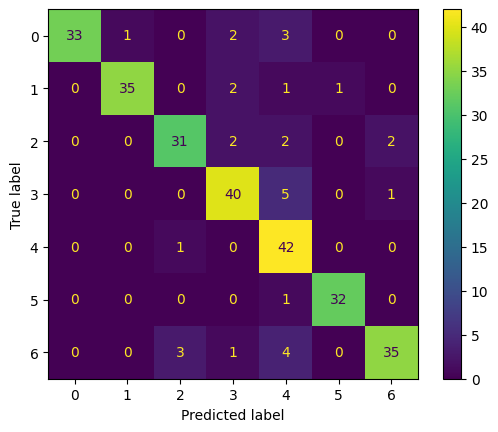

In [ ]:
cm_SGD = metrics.confusion_matrix(label_uji_aspek, prediksi_aspek)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_SGD)
cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(label_uji_aspek, prediksi_aspek))

0.8857142857142857


In [ ]:
from sklearn.metrics import f1_score
print(f1_score(label_uji_aspek, prediksi_aspek,average='macro'))

0.8909862619646501


In [ ]:
from sklearn.metrics import precision_score
print(precision_score(label_uji_aspek, prediksi_aspek,average='macro'))

0.9034125528620203


In [ ]:
from sklearn.metrics import recall_score
print(recall_score(label_uji_aspek, prediksi_aspek,average='macro'))

0.8873410632763514


###Sentiment Classification

In [ ]:
import re
import numpy as np
import pandas as pd

In [ ]:
dataShopee = pd.read_csv('UlasanShopeeNew_Lemmatization.csv', sep=',')
dataShopee

,jointekslemma,aspek,sentimen
0,mohon maaf mangapa shopee lebih susah buka con...,Efficiency,negatif
1,sekarang banyak akun toko tipu,Privacy,negatif
2,sangat puas barang datang sesuai layan puas,Fulfillment,positif
3,sangat bantu mepermudah belanja mohon tingkat ...,Efficiency,positif
4,fitur cari tidak akurat makin banyak bug beber...,System Availability,negatif
...,...,...,...
1395,customer service nya layan respons baik,Responsiveness,positif
1396,aplikasi shopee parah beli barang tidak sesuai...,Responsiveness,negatif
1397,masuk buat shopee customer minta kembali dana ...,Compensation,negatif
1398,mohon baik update baru tidak bisa transaksi un...,System Availability,negatif


In [ ]:
dataShopee = dataShopee.rename(columns = {"jointekslemma": "review"})

In [ ]:
tf_idf_data = pd.read_csv('tfidf_ShopeeLemma.csv')
tf_idf_data

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,was,waswas,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1396,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.329893,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1397,0.0,0.0,0.0,0.0,0.0,0.036619,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1398,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tf_idf_data['Dokumen'] = [f'Dokumen{i+1}' for i in range(len(dataShopee["review"]))]

In [ ]:
tf_idf_data

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,waswas,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat,Dokumen
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen2
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen3
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen4
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1396
1396,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.329893,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1397
1397,0.0,0.0,0.0,0.0,0.0,0.036619,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1398
1398,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1399


In [ ]:
sentimen = dataShopee.loc[:,['sentimen']]

In [ ]:
sentimen

,sentimen
0,negatif
1,negatif
2,positif
3,positif
4,negatif
...,...
1395,positif
1396,negatif
1397,negatif
1398,negatif


In [ ]:
tfidf_sentimen = tf_idf_data.join(sentimen)

In [ ]:
tfidf_sentimen

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat,Dokumen,sentimen
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1,negatif
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen2,negatif
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen3,positif
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen4,positif
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen5,negatif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1396,positif
1396,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.329893,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1397,negatif
1397,0.0,0.0,0.0,0.0,0.0,0.036619,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1398,negatif
1398,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1399,negatif


In [ ]:
tfidf_sentimen['sentimen'] = tfidf_sentimen['sentimen'].map({'negatif':-1,'positif':1})

In [ ]:
tfidf_sentimen.drop('Dokumen', axis=1, inplace=True)

In [ ]:
tfidf_sentimen

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,waswas,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat,sentimen
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1396,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.329893,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
1397,0.0,0.0,0.0,0.0,0.0,0.036619,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
1398,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data_latih_sentimen,data_uji_sentimen = train_test_split(tfidf_sentimen, test_size=0.2,random_state=27)

In [ ]:
print(data_uji_sentimen.shape[0])
print(data_latih_sentimen.shape[0])

280
1120


In [ ]:
data_latih_sentimen['sentimen'].value_counts()

 1    562
-1    558
Name: sentimen, dtype: int64

In [ ]:
data_uji_sentimen['sentimen'].value_counts()

-1    144
 1    136
Name: sentimen, dtype: int64

In [ ]:
label_latih_sentimen = data_latih_sentimen.pop('sentimen')

In [ ]:
label_uji_sentimen = data_uji_sentimen.pop('sentimen')

In [ ]:
def hinge_loss_function_sentimen(W_sentimen,X_sentimen,Y_sentimen,regularization_sentimen):
  jarak_sentimen = 1 - (Y_sentimen* np.dot(X_sentimen,W_sentimen))
  dw_sentimen = np.zeros(len(W_sentimen)) ##mengisi semua nilai dengan 0
  if max(0,jarak_sentimen)==0: ##fungsi max mengembalikan item dengan niai tertinggi dalam iterable
    di_sentimen=W_sentimen
  else:
    di_sentimen = W_sentimen - (regularization_sentimen * Y_sentimen*X_sentimen)
  dw_sentimen += di_sentimen
  return dw_sentimen

In [ ]:
from sklearn.utils import shuffle
def sgd_sentimen(data_latih_sentimen, label_latih_sentimen, learning_rate_sentimen = 0.0001, max_epoch_sentimen=10, regularization_sentimen=1000):
  data_latih_sentimen = data_latih_sentimen.to_numpy() ##mengubah data latih menjadi array numpy
  label_latih_sentimen = label_latih_sentimen.to_numpy()
  bobot_sentimen = np.zeros(data_latih_sentimen.shape[1]) ##data_latih.shape[1] = memberikan jumlah kolom (Gives number of columns). mengubah semua kolom dengan nilai 0 setelah mengetahui jumlah kolomnya
  for epoch_sentimen in range(1,max_epoch_sentimen+1):
    X_sentimen,Y_sentimen = shuffle(data_latih_sentimen,label_latih_sentimen,random_state=101)
    for index_sentimen,x_sentimen in enumerate(X_sentimen):
      delta_sentimen = hinge_loss_function_sentimen(bobot_sentimen,x_sentimen,Y_sentimen[index_sentimen],regularization_sentimen) #perhitungan nilai gradient cost function
      bobot_sentimen = bobot_sentimen - (learning_rate_sentimen * delta_sentimen)
  return bobot_sentimen

In [ ]:
W_sentimen = sgd_sentimen(data_latih_sentimen, label_latih_sentimen)
print(W_sentimen)

[-0.03123162 -0.11944699 -0.01689354 ...  0.1832522  -0.48977519
  0.0230836 ]


In [ ]:
def testing_sentimen(W_sentimen,data_uji_sentimen):
  prediksi_sentimen = np.array([])
  for i in range(data_uji_sentimen.shape[0]): ##data_uji.shape[0] = memberikan jumlah baris (Gives number of rows)
    y_prediksi_sentimen = np.sign(np.dot(W_sentimen,data_uji_sentimen.to_numpy()[i]))
    if y_prediksi_sentimen == 1 :
      print("positif")
    else :
      print("negatif")
    prediksi_sentimen = np.append(prediksi_sentimen,y_prediksi_sentimen) ##Tambahkan nilai ke akhir array.
  return prediksi_sentimen

In [ ]:
y_prediksi_sentimen = testing_sentimen(W_sentimen, data_uji_sentimen)

negatif
negatif
negatif
negatif
negatif
negatif
positif
negatif
negatif
positif
negatif
negatif
negatif
positif
negatif
negatif
negatif
positif
positif
negatif
positif
positif
positif
negatif
negatif
positif
positif
positif
positif
negatif
negatif
positif
positif
positif
positif
positif
negatif
negatif
negatif
positif
negatif
negatif
negatif
positif
positif
positif
negatif
negatif
negatif
positif
negatif
negatif
positif
negatif
negatif
positif
negatif
negatif
positif
positif
positif
negatif
negatif
positif
negatif
negatif
positif
positif
negatif
positif
positif
positif
negatif
positif
positif
negatif
negatif
negatif
negatif
negatif
positif
negatif
negatif
positif
positif
positif
negatif
negatif
positif
negatif
positif
negatif
positif
negatif
positif
negatif
negatif
positif
negatif
positif
positif
positif
positif
negatif
negatif
negatif
negatif
positif
negatif
positif
negatif
positif
negatif
positif
positif
positif
negatif
negatif
negatif
negatif
positif
positif
negatif
positif
positif


In [ ]:
print(y_prediksi_sentimen)

[-1. -1. -1. -1. -1. -1.  1. -1. -1.  1. -1. -1. -1.  1. -1. -1. -1.  1.
  1. -1.  1.  1.  1. -1. -1.  1.  1.  1.  1. -1. -1.  1.  1.  1.  1.  1.
 -1. -1. -1.  1. -1. -1. -1.  1.  1.  1. -1. -1. -1.  1. -1. -1.  1. -1.
 -1.  1. -1. -1.  1.  1.  1. -1. -1.  1. -1. -1.  1.  1. -1.  1.  1.  1.
 -1.  1.  1. -1. -1. -1. -1. -1.  1. -1. -1.  1.  1.  1. -1. -1.  1. -1.
  1. -1.  1. -1.  1. -1. -1.  1. -1.  1.  1.  1.  1. -1. -1. -1. -1.  1.
 -1.  1. -1.  1. -1.  1.  1.  1. -1. -1. -1. -1.  1.  1. -1.  1.  1. -1.
 -1. -1. -1. -1.  1. -1.  1. -1. -1. -1.  1.  1.  1. -1.  1. -1. -1.  1.
  1. -1.  1.  1. -1.  1. -1.  1. -1. -1. -1.  1. -1.  1.  1. -1.  1.  1.
 -1. -1. -1.  1.  1. -1. -1. -1.  1.  1.  1.  1. -1.  1. -1. -1. -1. -1.
  1.  1.  1.  1. -1. -1. -1. -1.  1.  1. -1.  1. -1.  1.  1. -1. -1. -1.
 -1. -1. -1. -1.  1.  1.  1. -1.  1.  1. -1.  1.  1.  1. -1. -1.  1. -1.
  1. -1. -1. -1.  1. -1.  1. -1.  1.  1. -1. -1. -1. -1. -1.  1.  1. -1.
 -1. -1.  1. -1.  1. -1. -1.  1. -1.  1.  1. -1. -1

In [ ]:
result_sentimen = pd.DataFrame({'Actual' : label_uji_sentimen})
result_sentimen

,Actual
870,-1
487,-1
179,-1
897,-1
339,1
...,...
483,1
87,-1
486,1
1011,1


In [ ]:
result1_sentimen = pd.DataFrame({'Predicted' : y_prediksi_sentimen}).astype("int")
result1_sentimen

,Predicted
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
275,1
276,-1
277,1
278,-1


In [ ]:
result_sentimen['Dokumen'] = [f'Dokumen{i+1}' for i in range(len(result_sentimen["Actual"]))]

In [ ]:
result

,Actual,Dokumen
870,Efficiency,Dokumen1
487,Fulfillment,Dokumen2
179,Fulfillment,Dokumen3
897,System Availability,Dokumen4
339,Compensation,Dokumen5
...,...,...
483,Contact,Dokumen276
87,System Availability,Dokumen277
486,Contact,Dokumen278
1011,Privacy,Dokumen279


In [ ]:
result1_sentimen['Dokumen'] = [f'Dokumen{i+1}' for i in range(len(result1_sentimen["Predicted"]))]
result1_sentimen

,Predicted,Dokumen
0,-1,Dokumen1
1,-1,Dokumen2
2,-1,Dokumen3
3,-1,Dokumen4
4,-1,Dokumen5
...,...,...
275,1,Dokumen276
276,-1,Dokumen277
277,1,Dokumen278
278,-1,Dokumen279


In [ ]:
actual_prediksi_sentimen = result_sentimen.merge(result1_sentimen, on='Dokumen')
actual_prediksi_sentimen

,Actual,Dokumen,Predicted
0,-1,Dokumen1,-1
1,-1,Dokumen2,-1
2,-1,Dokumen3,-1
3,-1,Dokumen4,-1
4,1,Dokumen5,-1
...,...,...,...
275,1,Dokumen276,1
276,-1,Dokumen277,-1
277,1,Dokumen278,1
278,1,Dokumen279,-1


In [ ]:
actual_prediksi_sentimen.drop('Dokumen', axis=1, inplace=True)

In [ ]:
actual_prediksi_sentimen

,Actual,Predicted
0,-1,-1
1,-1,-1
2,-1,-1
3,-1,-1
4,1,-1
...,...,...
275,1,1
276,-1,-1
277,1,1
278,1,-1


In [ ]:
actual_prediksi_sentimen.to_csv('actual_prediksi_sentimen.csv',index=False)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(label_uji_sentimen, y_prediksi_sentimen))

              precision    recall  f1-score   support

          -1       0.93      0.97      0.95       144
           1       0.96      0.92      0.94       136

    accuracy                           0.94       280
   macro avg       0.94      0.94      0.94       280
weighted avg       0.94      0.94      0.94       280



In [ ]:
from sklearn.metrics import confusion_matrix
matrix_sentimen = confusion_matrix(label_uji_sentimen, y_prediksi_sentimen)

In [ ]:
matrix_sentimen

array([[139,   5],
       [ 11, 125]])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

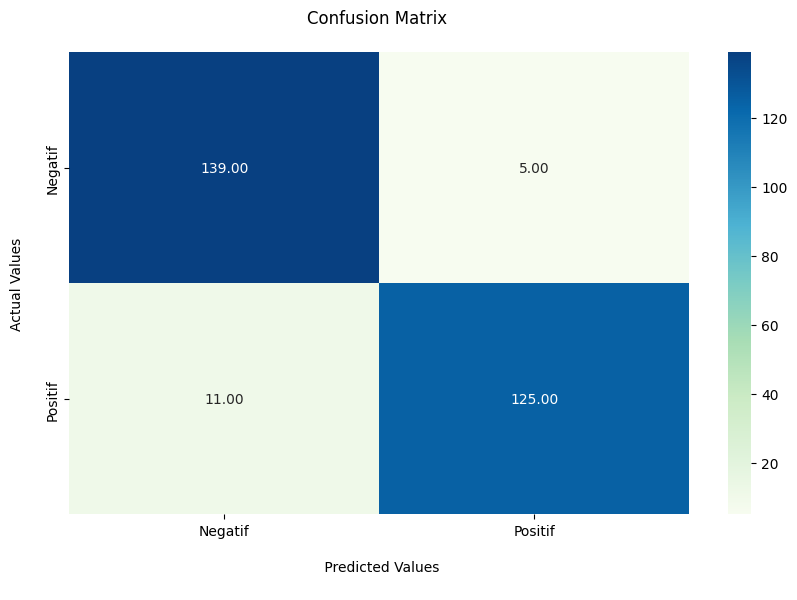

In [ ]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(label_uji_sentimen, y_prediksi_sentimen), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['Negatif','Positif'])
fx.yaxis.set_ticklabels(['Negatif','Positif'])
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(label_uji_sentimen, y_prediksi_sentimen))

0.9428571428571428


In [ ]:
from sklearn.metrics import f1_score
print(f1_score(label_uji_sentimen, y_prediksi_sentimen))

0.9398496240601504


In [ ]:
from sklearn.metrics import precision_score
print(precision_score(label_uji_sentimen, y_prediksi_sentimen))

0.9615384615384616


In [ ]:
from sklearn.metrics import recall_score
print(recall_score(label_uji_sentimen, y_prediksi_sentimen))

0.9191176470588235
